In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
df = pd.read_csv("/Users/changlu/Downloads/sales_data.csv")

In [176]:
df

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


Drop duplicated entries to eliminate possible entry errors, because it is impossible to have the same amount of products sold to the same places on the same day: 

In [177]:
df.drop_duplicates(inplace=True)
df

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
995,NaN,Region_7,31.83,13.0,2024-09-22
996,Product_36,NaN,46.19,9.0,2024-09-23
997,NaN,Region_7,311.80,13.0,2024-09-24
998,Product_2,Region_10,43.44,15.0,2024-09-25


In [178]:
df = df.dropna(subset='Region')
df = df.reset_index()
df

,index,Product,Region,Price,Units Sold,Sale Date
0,0,NaN,Region_6,75.96,10.0,2022-01-01
1,1,NaN,Region_1,175.78,8.0,2022-01-02
2,2,Product_46,Region_3,20.43,12.0,2022-01-03
3,3,Product_36,Region_1,12.77,10.0,2022-01-04
4,4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...,...
895,994,Product_1,Region_4,95.24,7.0,2024-09-21
896,995,NaN,Region_7,31.83,13.0,2024-09-22
897,997,NaN,Region_7,311.80,13.0,2024-09-24
898,998,Product_2,Region_10,43.44,15.0,2024-09-25


Check overall distribution of "Units Sold":  (with histplot and boxplot)

<Axes: xlabel='Units Sold', ylabel='Count'>

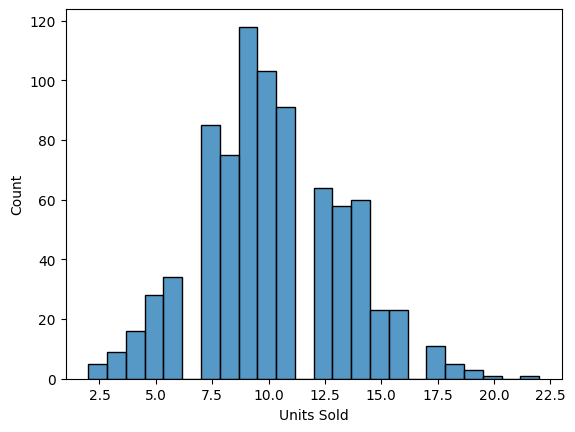

In [179]:
sns.histplot(df['Units Sold'])

<Axes: >

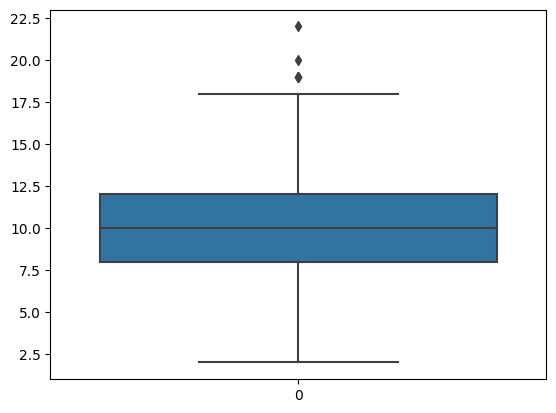

In [180]:
sns.boxplot(df['Units Sold'])

Observe Units Sold based on different regions:

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Region_6'),
  Text(1, 0, 'Region_1'),
  Text(2, 0, 'Region_3'),
  Text(3, 0, 'Region_7'),
  Text(4, 0, 'Region_9'),
  Text(5, 0, 'Region_2'),
  Text(6, 0, 'Region_4'),
  Text(7, 0, 'Region_5'),
  Text(8, 0, 'Region_8'),
  Text(9, 0, 'Region_10')])

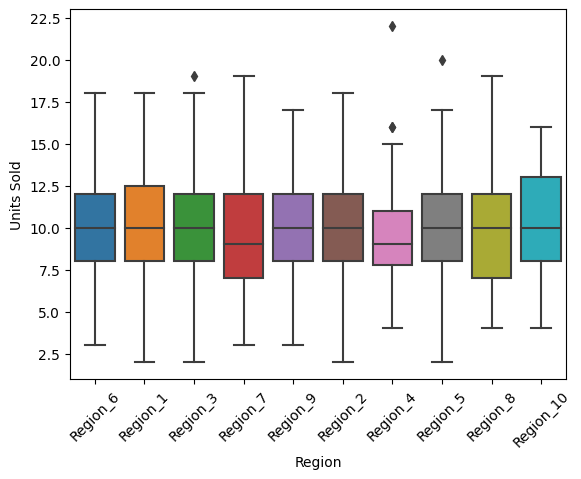

In [181]:
sns.boxplot(data = df, x = 'Region', y = 'Units Sold' )
plt.xticks(rotation = 45)

Check overall distribution of "Price":  (with histplot and boxplot)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Region_6'),
  Text(1, 0, 'Region_1'),
  Text(2, 0, 'Region_3'),
  Text(3, 0, 'Region_7'),
  Text(4, 0, 'Region_9'),
  Text(5, 0, 'Region_2'),
  Text(6, 0, 'Region_4'),
  Text(7, 0, 'Region_5'),
  Text(8, 0, 'Region_8'),
  Text(9, 0, 'Region_10')])

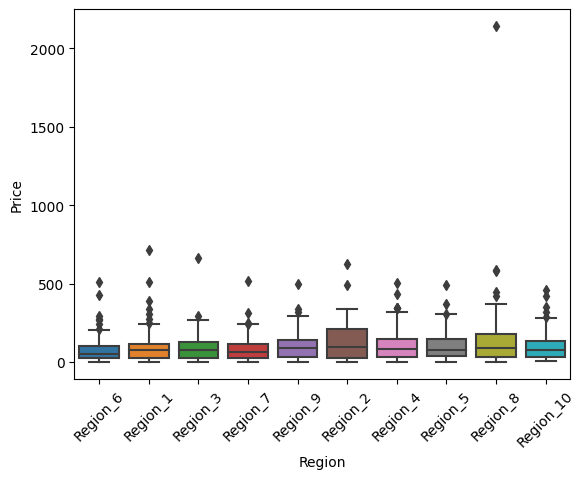

In [182]:
sns.boxplot(data = df, x = 'Region', y = 'Price' )
plt.xticks(rotation = 45)

In [183]:
#filter the data set and identify the outlier from region 8
df[df['Price'] >= 1500]

,index,Product,Region,Price,Units Sold,Sale Date
873,969,Product_15,Region_8,2143.3,5.0,2024-08-27


In [184]:
df.drop(873, inplace = True)
df['Revenue'] = df['Price'] * df['Units Sold']
df

,index,Product,Region,Price,Units Sold,Sale Date,Revenue
0,0,NaN,Region_6,75.96,10.0,2022-01-01,759.60
1,1,NaN,Region_1,175.78,8.0,2022-01-02,1406.24
2,2,Product_46,Region_3,20.43,12.0,2022-01-03,245.16
3,3,Product_36,Region_1,12.77,10.0,2022-01-04,127.70
4,4,Product_17,Region_6,125.69,6.0,2022-01-05,754.14
...,...,...,...,...,...,...,...
895,994,Product_1,Region_4,95.24,7.0,2024-09-21,666.68
896,995,NaN,Region_7,31.83,13.0,2024-09-22,413.79
897,997,NaN,Region_7,311.80,13.0,2024-09-24,4053.40
898,998,Product_2,Region_10,43.44,15.0,2024-09-25,651.60


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Region_6'),
  Text(1, 0, 'Region_1'),
  Text(2, 0, 'Region_3'),
  Text(3, 0, 'Region_7'),
  Text(4, 0, 'Region_9'),
  Text(5, 0, 'Region_2'),
  Text(6, 0, 'Region_4'),
  Text(7, 0, 'Region_5'),
  Text(8, 0, 'Region_8'),
  Text(9, 0, 'Region_10')])

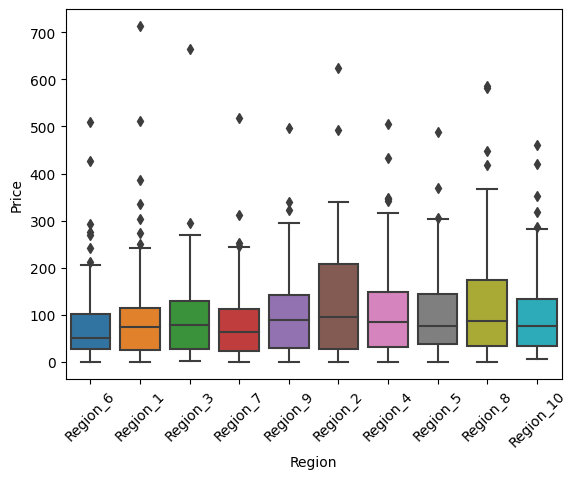

In [185]:
sns.boxplot(data = df, x = 'Region', y = 'Price' )
plt.xticks(rotation = 45)

In [188]:
df['Quarter'] = pd.to_datetime(df['Sale Date']).dt.quarter
grouped = df.groupby('Quarter')
merged_df = pd.concat([grouped.get_group(quarter) for quarter in grouped.groups], axis=0)
merged_df


,index,Product,Region,Price,Units Sold,Sale Date,Revenue,Quarter
0,0,NaN,Region_6,75.96,10.0,2022-01-01,759.60,1
1,1,NaN,Region_1,175.78,8.0,2022-01-02,1406.24,1
2,2,Product_46,Region_3,20.43,12.0,2022-01-03,245.16,1
3,3,Product_36,Region_1,12.77,10.0,2022-01-04,127.70,1
4,4,Product_17,Region_6,125.69,6.0,2022-01-05,754.14,1
...,...,...,...,...,...,...,...,...
650,723,Product_48,Region_5,73.14,13.0,2023-12-25,950.82,4
651,725,NaN,Region_8,NaN,5.0,2023-12-27,NaN,4
652,727,Product_5,Region_9,167.62,NaN,2023-12-29,NaN,4
653,728,Product_31,Region_3,665.00,9.0,2023-12-30,5985.00,4


In [196]:
df['Year'] = pd.to_datetime(df['Sale Date']).dt.year
df['Quarter'] = pd.to_datetime(df['Sale Date']).dt.quarter
df['YearQuarter'] = df['Year'].astype(str) + 'Q' + df['Quarter'].astype(str)
df


,index,Product,Region,Price,Units Sold,Sale Date,Revenue,Quarter,Year,YearQuarter
0,0,NaN,Region_6,75.96,10.0,2022-01-01,759.60,1,2022,2022Q1
1,1,NaN,Region_1,175.78,8.0,2022-01-02,1406.24,1,2022,2022Q1
2,2,Product_46,Region_3,20.43,12.0,2022-01-03,245.16,1,2022,2022Q1
3,3,Product_36,Region_1,12.77,10.0,2022-01-04,127.70,1,2022,2022Q1
4,4,Product_17,Region_6,125.69,6.0,2022-01-05,754.14,1,2022,2022Q1
...,...,...,...,...,...,...,...,...,...,...
895,994,Product_1,Region_4,95.24,7.0,2024-09-21,666.68,3,2024,2024Q3
896,995,NaN,Region_7,31.83,13.0,2024-09-22,413.79,3,2024,2024Q3
897,997,NaN,Region_7,311.80,13.0,2024-09-24,4053.40,3,2024,2024Q3
898,998,Product_2,Region_10,43.44,15.0,2024-09-25,651.60,3,2024,2024Q3


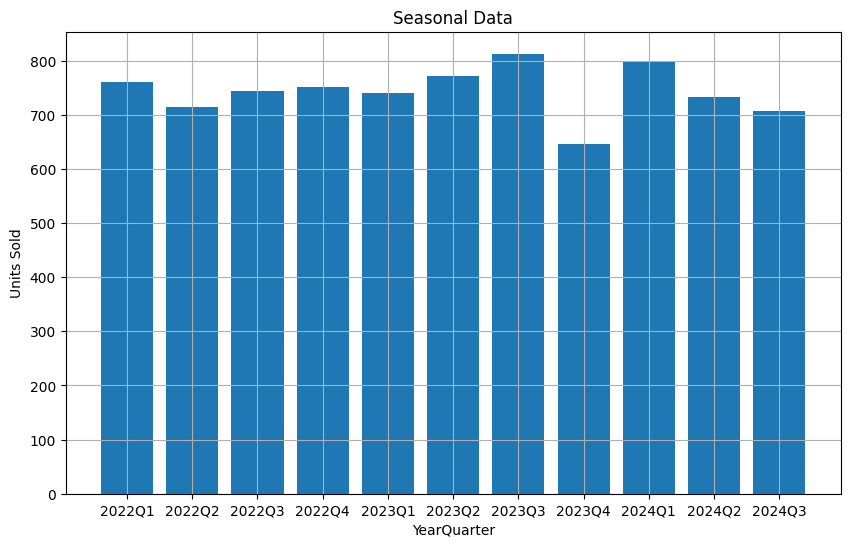

In [197]:
grouped = df.groupby('YearQuarter')['Units Sold'].sum().reset_index()
plt.figure(figsize=(10, 6))

# 绘制条形图
plt.bar(grouped['YearQuarter'], grouped['Units Sold'])

# 添加标题和标签
plt.title('Seasonal Data')
plt.xlabel('YearQuarter')
plt.ylabel('Units Sold')

# 自定义刻度标签（可选）
# plt.xticks(grouped['YearQuarter'])  # 如果需要自定义刻度标签，取消注释此行

# 显示网格线（可选）
plt.grid(True)

# 显示图形
plt.show()

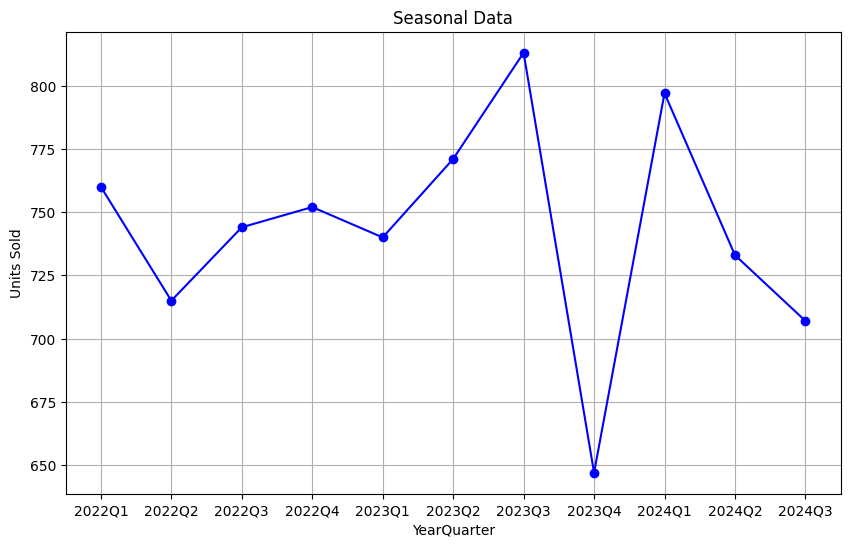

In [198]:
plt.figure(figsize=(10, 6))

# 绘制折线图
plt.plot(grouped['YearQuarter'], grouped['Units Sold'], marker='o', linestyle='-', color='b')

# 添加标题和标签
plt.title('Seasonal Data')
plt.xlabel('YearQuarter')
plt.ylabel('Units Sold')

# 自定义刻度标签（可选）
# plt.xticks(grouped['YearQuarter'])  # 如果需要自定义刻度标签，取消注释此行

# 显示网格线（可选）
plt.grid(True)

# 显示图形
plt.show()

Question:
1) What conclusions can you draw about sales performance of various products and regions?

    Based on the box plot for regions and units sold, most regions have similar sale performance with an median units sold of 10 and similar Q1 and Q3. However, region 4 and 7 have a comparably low median. Region 4 has lower IQR but more outliers. Region 7, 8 and 10 have bigger IQR, which means they are more likely to spend more on the products.

2) What recommendations do you have for the business?

    Based on the box plot for regions and prices of units sold, region 2 and 8 have a larger IQR, which means they generally spend more on products and have a better business opportunity in the future. Region 6 and 7 have both lower IQR and median, which means they may not be perfect regions to expand their business. 
    Other regions have similar IQRs and medians, it is okay to continue operation but further expansion in business may not be considered.
3) Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?

    First of all, I dropped all the duplicates as it is possible to have the same transactions to the same regions in the same day. 